### To install jupyter extensions:
* Extensions are like add-ons can make your work on notebooks significantly easier. Follow the steps in below link.
* https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator
* Hit Tab after . to see all the functions like np. TAB
* Hit Shift+Tab after ( opening bracket to see function definition. Like pd.read_csv(  SHIFT+TAB

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sbs

from scipy.spatial import distance
from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, ShuffleSplit,cross_validate, \
cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, adjusted_rand_score, mean_squared_error
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
import scipy.stats as stats

In [5]:
# lets use the Titanic dataset where ever applicable 
tnic_df = pd.read_csv('data/titanic_kaggle_dataset.csv', header=0, dtype={'Age':np.float64})
tnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
boston_dataset = datasets.load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


## Linear Regression Using Sklearn

# Machine Learning:

1. Machine learning is a subset of Artificial Intelligence(AI), which provides machines the ability to learn automatically and improve from experience without being explicitly programmed. 
2. Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called __data mining__.
3. Types of Machine Learning Systems:
    * __Supervised, Unsupervised, Semi-supervised and Reinforcement Learning__
    * __Online Vs Batch Learning__
    * __Instance-based vs Model-base learning__


# Supervised vs Unsupervised SemiSupervised vs Reinforcement Learning:
1. __Supervised__: We give the machine Labelled data and teach them this is what is the output.
2. __Unsupervised__: Data provided is not labelled and machine has to learn without any supervision. It has to discover hidden pattern and discover the data. Ex photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering).Now all the system needs is for you to tell it who these people are. Just one label per person,4 and it is able to name everyone in every photo, which is useful for searching photos.
3. __Semi-Supervised__: Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning.
3. __Reinforcement__: Here the machine is put in an unknown environment and it has to learn by itself based on trial and error.For example, many robots implement Reinforcement Learning algorithms to learn how to walk.
<img src='images/image95.png' style='width:500px;height:400px' />
<img src='images/image96.png' style='width:500px;height:400px' />
4. Here in Unsupervised learning the machine learns by itself to classify the different animals that we feed as belonging to either of the two types by studying the animals features that we feed. Of course it will not know that the animals it categorised on left is known as dogs and the right is known as cats. But it learns by itself how cats look and how dogs look and group the fed data  into specific groups.
<img src='images/image97.png' style='width:500px;height:400px' />

## Supervised:
1. __Classification Algorithms__: Classification Algorithms could be broadly classified as the following:
    * https://analyticsindiamag.com/7-types-classification-algorithms/
    * https://dzone.com/articles/introduction-to-classification-algorithms
    * Linear Classifiers
        * Logistic regression
        * Naive Bayes classifier
        * Fisher’s linear discriminant
    * Support vector machines
        * Least squares support vector machines
    * Quadratic classifiers
    * Kernel estimation
        * k-nearest neighbor
    * Decision trees
        * Random forests
    * Neural networks
    * Learning vector quantization
2. __Regression Algorithms__: 
    * Simple Linear Regression model8
    * Lasso Regression
    * Logistic regression
    * Support Vector Machines
    * Multivariate Regression algorithm
    * Multiple Regression Algorithm

# Unsupervised Algorithms
*https://www.newtechdojo.com/list-machine-learning-algorithms/
1. __Clustering__: You may want to run a clustering algorithm to try to detect groups of similar visitors. Ex say you want to cluster your blog's visitors and have lot of data about your blog’s visitors.
    * K-means
    * C-means
    * Hierarchical Cluster Analysis (HCA)
    * mixture models
    * DBSCAN
2. __Association__:  association rule learning, in which the goal is to dig into large amounts of data and discover interesting relations between attributes. Ex you may want to run a Association on your sales logs Shopping mall sales logs 
    * Apriori algorithms for assiciation rule
    * Eclat
2. __Anomaly detection and novelty detection__: __anomaly detection__—for example, detecting unusual credit card transactions to prevent fraud, catching manufacturing defects, or automatically removing outliers from a dataset before feeding it to another learning algorithm. A very similar task is __novelty detection__: the difference is that novelty detection algorithms expect to see only normal data during training, while anomaly detection algorithms are usually more tolerant, they can often perform well even with a small percentage of outliers in the training set.  
    * One-Class SVM
    * Isolation Forest
4. __Visualization and dimensionality reduction__: __Visualization algorithms__ are also good examples of unsupervised learning algorithms: you feed them a lot of complex and unlabeled data, and they output a 2D or 3D representation of your data that can easily be plotted. A related task is __dimensionality reduction__, in which the goal is to simplify the data without losing too much information.  One way to do this is to merge several correlated features into one. For example, a car’s mileage may be very correlated with its age, so the dimensionality reduction algorithm will merge them into one feature that represents the car’s wear and tear. This is called __feature extraction__.
    * Principle Component analysis(PCA)
    * Kernel PCA
    * Locally-Linear Embedding (LLE)b
    * t-distributed Stochastic Neighbor Embedding (t-SNE)

## Batch Vs Online Laerning:
1. Another criterion used to classify Machine Learning systems is whether or not the system can learn incrementally from a stream of incoming data.
2. __Batch Learning__ :First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called __offline learning__. If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one. Fortunately, the whole process of training, evaluating, and launching a Machine Learning system can be automated fairly easily.
3. This solution is simple and often works fine, but training using the full set of data can take many hours, so you would typically train a new system only every 24 hours or even just weekly. If your system needs to adapt to rapidly changing data (e.g., to predict stock prices), then you need a more reactive solution. If your resources are limited then you better go for Online Learning.
5. __Linear Least Square__ is a Batch learning AL.
4. __Online/Incremental Learning__: In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives. Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) and need to adapt to change rapidly or autonomously.
5. One important parameter of online learning systems is how fast they should adapt to changing data: this is called the learning rate. If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to quickly forget the old data. Same is other way around.
6. A big challenge with online learning is that if bad data is fed to the system, the system’s performance will gradually decline. To reduce this risk, you need to monitor your system closely and promptly switch learning off (and possibly revert to a previously working state) if you detect a drop in performance. You may also want to monitor the input data and react to abnormal data (e.g., using an anomaly detection algorithm).
7. __Recursive Least Squares (RLS)__ algorithm is a Online Learning AL.
8. https://en.wikipedia.org/wiki/Online_machine_learning

## Instance Vs Model based Learning:
1. Generalization — usually refers to a ML model’s ability to perform well on new unseen data rather than just the data that it was trained on.
2. One more way to categorize Machine Learning systems is by how they generalize. Most Machine Learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to generalize to examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances There are two main approaches to generalization: __instance-based learning and model-based learning.__
2. __Insatance based__ : sometimes called memory-based learning is a family of learning algorithms that, instead of performing explicit generalization, compares new problem instances with instances seen in training, which have been stored in memory. Ex: Decision Tree, 
3.  Instance-based learning: the system learns the examples by heart, then generalizes to new cases by comparing them to the learned examples (or a subset of them), using a similarity measure. For example: Instead of just flagging emails that are identical to known spam emails, your spam filter could be programmed to also flag emails that are very similar to known spam emails. This requires a measure of similarity between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email. This is called Instanced based learning.
3. __Model based__ : Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. This is called model-based learning. Ex: All Rregression ALs.
4. In a ML project you gather data in a training set, and you feed the training set to a learning algorithm. If the algorithm is model-based it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart and generalizes to new instances by comparing them to the learned instances using a similarity measure.

### Feature Engineering
1. Feature engineering is the addition and construction of additional variables, or features, to your dataset to improve machine learning model performance and accuracy. The most effective feature engineering is based on sound knowledge of the business problem and your available data sources.
2. As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called feature engineering, involves:
    * __Feature Selection__ : selecting the most useful feature.
    * __Feature Extraction__ : combining existing features to produce a more useful one (as we saw earlier, dimensionality reduction algorithms can help).
    * Creating new feature by gathering new data.
    

### Evaluation of ALs:
1. The only way to know how well a model will generalize to new cases is to actually try it out on new cases. Thats done by dividing the traings set into train and test sets. The error rate on new cases is called the __generalization error__ (or out of __sample error__), and by evaluating your model on the test set, you get an estimate of this error. This value tells you how well your model will perform on instances it has never seen before.
10. Accuracy scores cannot be used for regression, its is basically meant for classification. We have 'Mean Squared Error' for regression.
12. Reference
    * https://scikit-learn.org/stable/modules/model_evaluation.html
    * https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

### sklearn Preprocessing data
* https://scikit-learn.org/stable/modules/preprocessing.html
* __Standardization__ of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
* For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might __dominate__ the objective function and make the estimator unable to learn from other features correctly as expected.
* Normalization Vs Standardization:
    * https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization
    * Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale. However, the outliers from the data set are lost.
        Xchanged = (X−Xmin) / (Xmax−Xmin)
    * Standardization rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance).

        Xchanged = X−Mean(μ) / Std Deviation(σ)
    For most applications standardization is recommended. 

### sklearn.preprocessing.scale
* sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True) --> This will __Standardize__ (Mean = 0 and unit variance) a dataset along any axis
* The function scale provides a quick and easy way to perform this operation on a single array-like dataset

In [6]:
Sample_train = np.array([[1,2,3],[4,5,6],[1,2,3]])
Sample_scale = scale(Sample_train)
print(Sample_scale.mean(axis = 0)) # axis = 0 because standardization happen on each col/feature.
print(Sample_scale.std(axis = 0))

[0. 0. 0.]
[1. 1. 1.]


### sklearn.preprocessing.StandardScaler
* sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True) --> Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform..
* This class has the following methods:  
<img src="images/image5.png" align="middle" style="width:400px; height:200px" />  
* Difference between scale and standardScaler
    Those are doing exactly the same, but:
    preprocessing.scale(x) is just a function, which transforms some data
    to Standrd data. StandardScaler() is a class supporting the Transformer API
    I would always use the latter, even if i would not need inverse_transform and co. supported by StandardScaler().

In [6]:
sample_train = np.array([[1,2,3],[4,5,6],[1,2,3]])
sample_test = np.array([[1,1,1],[2,2,2],[3,3,3]])
print(sample_train)
print(sample_test)

[[1 2 3]
 [4 5 6]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [7]:
my_scaler = StandardScaler()
my_scaler.fit(Sample_train) # Computes the mean and std deviation and stores in its class attributes
scaled_train = my_scaler.transform(Sample_train)# Perform Standardization using fit data stored
#my_scaler.fit_transform(Sample_train) # first fit (computes and stores), then apply to sample_train 
scaled_test = my_scaler.transform(sample_test) # apply the same standardization to testing data
print(scaled_train)
print("*** train mean - ", scaled_train.mean(axis=0))
print("*** train std - ", scaled_train.std(axis=0))
print(scaled_test)
print("*** test mean - ", scaled_test.mean(axis=0)) # won't be 0 as we are using mean is from train data
print("*** test std - ", scaled_test.std(axis=0))

[[-0.70710678 -0.70710678 -0.70710678]
 [ 1.41421356  1.41421356  1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]]
*** train mean -  [0. 0. 0.]
*** train std -  [1. 1. 1.]
[[-0.70710678 -1.41421356 -2.12132034]
 [ 0.         -0.70710678 -1.41421356]
 [ 0.70710678  0.         -0.70710678]]
*** test mean -  [ 0.         -0.70710678 -1.41421356]
*** test std -  [0.57735027 0.57735027 0.57735027]


In [8]:
rescaled_train = my_scaler.inverse_transform(scaled_train)
rescaled_test = my_scaler.inverse_transform(scaled_test)
print(rescaled_train)
print(rescaled_test)

[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


# Decision Tree

1. Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving __regression__ and __classification__ problems too.
2. Decision trees are most commonly used. It is one of the few classifier algorithms that is easy to interpret and analyze. We actually know how it works and how it classifies a given data.
3. Decision trees use the features( columns) that you provide to build the tree and make the best prediction. So it's important that you choose your features that you feed the decision tree precisely.

#### Reference:
1. https://www.youtube.com/watch?v=tNa99PG8hR8&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=2
2. John Gordon - https://www.youtube.com/watch?v=eKD5gxPPeY0
3. __*IMP* must listen__ John Gordon - https://www.youtube.com/watch?v=LDRbO9a6XPU&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=8
4. https://scikit-learn.org/stable/modules/tree.html

 ### Important Terminology: 
1. __Root Node__: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
2. __Leaf / Terminal Node__: Nodes do not split is called Leaf or Terminal node.
3. __Pruning__: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
4. __Branch / Sub-Tree__: A subsection of the entire tree is called branch or sub-tree.
5. __Decision/Internal Node__: When a sub-node splits into further sub-nodes, then it is called the decision node.
6. The root and the decision/internal node have test conditions.

<img src="images/image1.png" style="width:400px; height:200px; float:left"/>

1. https://en.wikipedia.org/wiki/Decision_tree_learning

2. __Gini Impurity__ : 
    * https://www.youtube.com/watch?v=LDRbO9a6XPU&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=8 at time 5:00
    * Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set. or in simple terms GINI Impurity gives us the probability of being incorrect.
    * it ranges  between 0-1. Lower values indicate less uncertanity or mixing and higher value indicate more uncertanity
    * It reaches its minimum (zero) when all cases in the node fall into a single target category.
    * Gini Impurity : Calculated as         
                            j                         j
                    G(k) =  Σ P(i) * (1 - P(i)) = 1 - Σ P(i)^2
                            i=1                       i=1
      
    * Gini Gain / Information Gain: (GI of Total dataset) - (Sum of weighted GI of each branch)
    Basically Information gain will give us how much impurity will be reduced if we split with this question in the feature comapred to other question in a feature. And this will tell the decision tree to split on specific feature first. Checkout the video.
<img src="images/image11.png" align="middle" style="width:350px; height:180px"/>
<img src="images/image12.png" align="middle" style="width:350px; height:50px"/>
3. https://victorzhou.com/blog/gini-impurity/ --> This will explain how to calculate Gini Impurity and Gini Gain and how it is used to make a split in decision tree. Also read about Information gain.

### Basic Usage 

In [9]:
#Apple and Orange classification. Oranges are bumpy and heavier. 
#training_data = [[140, "smooth"], [170, "bumpy"], [135, "smooth"], [155, "bumpy"], [165, "bumpy"]] 
#labels = ["apple", "orange", "apple", "orange", "orange"]
training_data = [[140, 0], [170, 1], [135, 0], [155, 1], [165, 1]]
labels = [2, 3, 2, 3, 3]

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data, labels)

In [11]:
clf.predict([[135, 0]])  # answer is 2 as its smooth and light weight so it's apple

array([2])

### Plot a decision tree
__sklearn.tree.plot_tree__ for the above example we can use tree.plot_tree(clf) to get the decision tree visualisation.

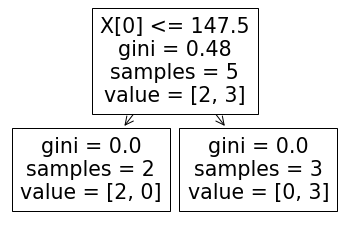

In [12]:
tree.plot_tree(clf);  # ; will remove the text from output cell.

### Decision Tree Classifier from Scratch

##### Classifier can be thought as a function y=f(x) with y being target output/label and f(x) as our features.
<img src="images/image2.png" style="width:150px; height:100px; float:left"/>

In [13]:
#sklearn provide some datasets to work with, one of which is iris
iris = datasets.load_iris() #iris is a dict with keys as 'data', 'target', 'feature_name' etc
#iris

In [14]:
#use train_test_split to partition the data into training and testing group.
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # split 50-50 between test and train data

Its pretty easy to switch between different classifier as shown below. 90% of the code flow remains the same.

In [15]:

clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train);

In [16]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9466666666666667

## k-nearest neighbors classifier algorithm
A powerful Supervised machine learning algorithm used for classification and regression (mostly classification). KNN is based on __feature similarity__. It classifies a data point based on how its neighbors are classified.
* Algorithm : 
    * As the name suggest the KNN first studies the training data. 
    * The for each new test data (a row in iris data set), it will try to find the nearest neighbour( a row in iris training data set) using euclidean distance. 
    * The nearest neighbour label is assigned to the test data set.
    * If two nearest neighour have the same distance, then the k value is used to get a voting.

* _k_ in the KNN is a parameter that refers to the number of nearest neighbors to include in the majority voting process. It uses EUCLIDEAN distance to find the nearest neighbor.
* Choosing a right value of _k_ is a process called as __parameter tuning__, and is important for better accuracy.  
<img src="images/image3.png" align = "middle" style="width:400px; height:200px;"/>   
* Choose th evalue of _k_:
    * __sqrt(n)__ where n is the total number of data points
    * after sqrt(n) if the number of feature are even make the _k_ odd and vise-versa
* When to use KNN:
    * For classification
    * Data is labeled.
    * Data is noise free 
    * Dataset is small 
<img src="images/image4.png" align = "middle" style="width:400px; height:200px;"/>


__Pros__:
* KNN is a __non-parametric__. When we say a technique is non-parametric , it means that it does not make any assumptions on the underlying data distribution. A __parametric model__ is one where we assume the 'shape' of the data, and therefore only have to estimate the coefficients of the model. A __non-parametric model__ is one where we do not assume the 'shape' of the data, and we have to estimate the most suitable form of the model, along with the coefficients.
* __parametri model__ : Y = a + bX is a parametric model with parameters "a" and "b". To find the value of Y at a new value of X, the values of "a" and "b" are sufficient. We don't need the data that had been used to estimate "a" and "b". __Ex: Linear/logistic Regression, Perceptron, Naive Bayes.__
* __non-parametric model__ :However, in the non-parametric approach, all of the previously used training data need to used along with the untrained value and the estimated quantities in order to perform prediction. Such "quantities" in the non-parametric method are sometimes referred to as __"hyper-parameters"__. __Ex: k-Nearest Neighbors, Decision Trees like CART and Support Vector Machines__

__Cons__:
* Its a __lazy__ algorithm. To be more exact, all (or most) the training data is needed during the testing phase.Basically the KNN iterate over every training set data to make a new test prediction.
* If your _k_ is too __low__, your predict is not that accurate. If _k_ is too __high__ then its gonna take for ever to process and you are gonna run into processing/resource issues.

## K-NN classifier from scratch with k=1:
reference: https://www.youtube.com/watch?v=AoeEHqVSNOw&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=5

In [16]:
class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return np.array(predictions)
    
    def closest(self, row):
        #from scipy.spatial import distance to calculate the euclidean distance
        best_dist = distance.euclidean(row, self.X_train[0])  
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])
            if  dist < best_dist:
                best_dist = dist
                best_index = i   
        return self.y_train[best_index]

In [17]:
a=[1,1,1,1]
b=[2,2,2,2]
c=[2,3,4,5]
distance.euclidean(b,c)

3.7416573867739413

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = ScrappyKNN()
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9333333333333333

In [19]:
confusion_matrix(y_test, predictions)

array([[23,  0,  0],
       [ 0, 21,  1],
       [ 0,  4, 26]], dtype=int64)

### Classification Accuracy and its Limitations
* Classification accuracy is the ratio of correct predictions to total predictions made.  
    classification accuracy = $\frac{correct predictions} {total predictions} * 100$
* Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as: error rate = (1 - (correct predictions / total predictions)) * 100
* The main problem with classification accuracy is that it hides the detail you need to better understand the performance of your classification model. There are two examples where you are most likely to encounter this problem:
    1. When your data has more than 2 classes. With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.
    2. When your data does not have an even number of data in classes. You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value. Ex: Would you believe someone who claimed to create a model entirely in their head to identify terrorists trying to board flights with greater than 99% accuracy? Well, here is the model: simply label every single person flying from a US airport as not a terrorist. Given the 800 million average passengers on US flights per year and the 19 (confirmed) terrorists who boarded US flights from 2000–2017, this model achieves an astounding accuracy of 99.9999999%!
* Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a confusion matrix.

### Confusion Matrix: 
* A confusion matrix is a technique for summarizing the performance of a classification algorithm.
* The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
<img src="images/image6.png" align = "middle" style="width:200px; height:120px;"/>
* True Positive (TP) : these are the events that were correctly predicted by the model as "occurred = Yes."
* True Nagative (TN) : These are the events that were correctly predicted by the model as "occurred = No."
* False Positive (FP) : These are the events that were predicted as "occurred = Yes," but in reality, it was "occurred = No." __eqv. to false alarm, Type I error__
* False Negative (FN) : This is the opposite of FP, i.e. predicted as "occurred = No," but in reality, it was "occurred = Yes." __eqv. to miss, Type II error__

#### Reference:
1. https://en.wikipedia.org/wiki/Confusion_matrix --> Check this for all the calcualtion
2. https://www.youtube.com/watch?v=vP06aMoz4v8 --> Josh Starmer
3. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c -- VVIMP must read


1. __recall/ sensitivity/ hit rate/ true pos rate (TPR)__: the ability of a model to find all the relevant cases within a dataset.
\begin{equation*}
TPR = \frac{TP}{TP + FN} = 1 - FNR
\end{equation*}
<img src="images/image7.png" align = "middle" style="width:300px; height:200px;"/>
2. __specificity, selectivity or true negative rate (TNR)__:
\begin{equation*}
TNR = \frac{TN}{TN + FP} = 1 - FPR
\end{equation*}
<img src="images/image8.png" align = "middle" style="width:300px; height:200px;"/>

Check the above video to calculate sensitivity and specificity of a model with more than 2 predicting value.

3. __precision__ :  the ability of a classification model to identify only the relevant data points.
\begin{equation*}
TPR = \frac{TP}{TP + FP}
\end{equation*}
4. __F1-score__ : It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall.
$F1-score = 2*\frac{Precision*Recall}{Precision+Recall}$
    * We use the harmonic mean instead of a simple average because it punishes extreme values.
    * In some situations, we might know that we want to maximize either recall or precision at the expense of the other metric. For example, in preliminary disease screening of patients for follow-up examinations, we would probably want a recall near 1.0 — we want to find all patients who actually have the disease — and we can accept a low precision if the cost of the follow-up examination is not significant. 
    * If we want to create a balanced classification model with the optimal balance of recall and precision, then we try to maximize the F1 score.

### Arithmatic Vs Goemetric Vs Harmonic Mean:
1. https://towardsdatascience.com/on-average-youre-using-the-wrong-average-geometric-harmonic-means-in-data-analysis-2a703e21ea0
4. There are lot of ways to represent the average of a dataset. Like Arithmetic mean, Geometric mean, Harmonic mean. Differetn kind of dataset require different avearges to be used.
2. The arithmetic mean is just one among many ways of arriving at an “average” value. Sum / num of elements. AM is very well suited for linearly realated dataset. AM is ill suited if we have large outliers in dataset or exponentila.
3. Geometric mean : Assume we have a dataset sqaure of 3 --> [1,3,9,27,81,243,729]. This is a exponential curve. In this situation, the arithmetic mean is ill-suited to produce an “average” number to summarize this data. The arithmetic mean = 156.1. 156 isn’t particularly close to most of the numbers in our dataset. In fact it’s more than 5x the median (middle number), which is 27. Here is where we use Geometric means comes handy
<img src='images/image91.png' style='width:200px;height:200px' />
4. __Geometric mean__: Since the relationship is multiplicative, to find the geometric mean we multiply rather than add all the numbers. Then to rescale the product back down to the range of the dataset, we have to take the nth root, rather than simply dividing. In our case GM will be 7th root of 1*3*..*729 = 27.  the geometric mean will not always equal the median, only in cases where there is an exact consistent multiplicative relationship between all numbers (e.g. multiplying each previous number by 3, as we did).
$GM = {^n}\sqrt{x_1*x_2..*x_n}$
5. It turns out that there are many practical uses for the geometric mean, as multiplicative-ish relationships abound in the real world. One Ex: Assume we have dollar 100,000 that accrues a varying rate of interest each year for 5 years: annual interest rates: 1%, 9%, 6%, 2%, 15%. Similar datatset which has rate equation we use GM.
6. A fancy feature of the geometric mean is that you can actually average across numbers on completely different scales. Read the coffeshop rating example from the above link.
7. __Harmonic Mean__: Whereas the arithmetic mean requires addition & the geometric mean employs multiplication, the harmonic mean utilizes reciprocals. Another way to think about reciprocals is: two numbers that equal 1 when multiplied together. So when finding the reciprocal of a number n, we are simply asking: what number must we multiply with n in order to get 1. (This is why the reciprocal is also sometimes called the multiplicative inverse.)EX. A simple example from wikipedia: the harmonic mean of 1, 4, and 4 is 2.   
$\frac{3}{\frac{1}{1}+\frac{1}{4}+\frac{1}{4}}$ = 2
8. Notice, what we are saying here is: if the reciprocal of every number in our dataset was the same number, what number would it have to be in order to have the same reciprocal sum as our actual dataset?

* __Practical application of sensitivity and specificity__ : If we calculate the sensistivity and specficity for two ML models say Random forest and Logistic Regression and here are the numbers.
LR: Sensi: 0.81 and Speci: 0.85
RF: Sensi: 0.83 and Speci: 0.82
A high Sensitivity in RF tell us that the RF can predict the True Positive slightly higher than the LR. So RF is better at predicting people with Heart Desease. So use the RF model if its more important for you to know which patient is going to have a heart disease.
A high Specificity in LR tells us that the LR can predict the True Negative slightly higher than the RF. So use the LR model if its more important for you to know which patient is not going to have a heart disease.
<img src="images/image9.png" align = "left" style="width:200px; height:300px;"/>
<img src="images/image10.png" align = "middle" style="width:200px; height:300px;"/>

### ROC - Reciever Operating Characterstics(ROC) curve
1. The other main other than recall and precision technique for showing the performance of a classification model is the Receiver Operating Characteristic (ROC) curve.
2. The ROC curve shows how the recall vs precision relationship changes as we vary the threshold for identifying a positive in our model.
3. An ROC curve plots the true positive rate on the y-axis versus the false positive rate on the x-axis. The true positive rate (TPR) is the recall and the false positive rate (FPR) is the probability of a false alarm. Both of these can be calculated from the confusion matrix:   
$ROC = \frac{True Positive Rate}{False Positive Rate}$ $TPR = \frac{TP}{TP+FN}$ $FPR = \frac{FP}{FP+TN}$
4. <img src='images/image90.png' style='width:200px;height:200px'/>
5. The black diagonal line indicates a random classifier and the red and blue curves show two different classification models. For a given model, we can only stay on one curve, but we can move along the curve by adjusting our threshold for classifying a positive case. Generally, as we decrease the threshold, we move to the right and upwards along the curve. With a threshold of 1.0, we would be in the lower left of the graph because we identify no data points as positives leading to no true positives and no false positives (TPR = FPR = 0). As we decrease the threshold, we identify more data points as positive, leading to more true positives, but also more false positives (the TPR and FPR increase). Eventually, at a threshold of 0.0 we identify all data points as positive and find ourselves in the upper right corner of the ROC curve (TPR = FPR = 1.0).
6. Finally, we can quantify a model’s ROC curve by calculating the total __Area Under the Curve (AUC)__, a metric which falls between 0 and 1 with a higher number indicating better classification performance. In the graph above, the AUC for the blue curve will be greater than that for the red curve, meaning the blue model is better at achieving a blend of precision and recall. A random classifier (the black line) achieves an AUC of 0.5.


In [74]:
# Confusion matrix for above Iris dataset with ScrappyKNN
# https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = predictions
print('Confusion Matrix\n')
print(confusion_matrix(y_test, predictions))
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))

# scores for each class of setosa, verginica, versicolor
# precision_score(y_test, y_pred, average=None)
print('Recall: ',recall_score(y_test, y_pred, average=None))
print('Precision: ',precision_score(y_test, y_pred, average=None))
print('F1-score: ',f1_score(y_test, y_pred, average=None))
print('\n')

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Verginica', 'Versicolor']))


Confusion Matrix

[[23  0  0]
 [ 0 21  1]
 [ 0  4 26]]

Accuracy: 0.93

Recall:  [1.         0.95454545 0.86666667]
Precision:  [1.         0.84       0.96296296]
F1-score:  [1.         0.89361702 0.9122807 ]


Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.93
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        23
   Verginica       0.84      0.95      0.89        22
  Versicolor       0.96      0.87      0.91        30

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.94        75
weighted avg       0.94      0.93      0.93        75



## Cluster Analysis : An unsupervised ML 
1. The goal of Cluster Analysis is to organise similar items in your data set into groups or clusters.
2. Ex application : In a retail industry segment/cluster your customer base into groups/clusters based on their purchase history. Grouping latest news articles into topics of the day, to itendify the trending topic of the day.
3. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.
4. Eucledean Distance / Manhattan Distance or Cosine Similarity is used in Clustering Algorithm to measure similarity between data points. 
5. Since clustering is a unsupervised learning technique (there is no labelled data), there is no "correct" clustering data. we are just trying to get the best clustering possible. Also clustering can result into numerous groups/clusters without a label. It requires further interpretation and analysis of the cluster we can come with some labels to the cluster and make use of this data.


### K-Means Clustering Algorithm
1. A very important question to ask yourself before starting clustering is, What are you trying to cluster and on what basis. You should know the question you are trying to answer. Ex: given a set of alphabets[A..Z]. We can cluster them based on there phenetic sounds. based on position, based on simplicity of writing them , most commonly used etc etc. So its important to know waht clustering you want.
1. Steps in K-Means Algorithm:  https://en.wikipedia.org/wiki/K-means_clustering  
    a. To begin, we first select a number of classes/groups(_k_) to use and randomly initialize their respective centroids.  
    b. Assign each sample to the closest centroid using Eucledian distance  
    c. Calculate mean of cluster which will be your new centroid.  
    d. Repeat (b) and (c) until stopping criteria is reached.  
<img src="images/image13.png" align = "middle" style="width:600px; height:300px;"/>
2. How to select Initial Centroid: Lots of sophesticated methods are there, one of the easy method is below.  
    a. __Issue__: Final Cluster are sensitive to Initial centroids selected.  
    b. __Solution__: Run k-means multiple times with different initial centroid and choose the best results.
3. __Evaluating Cluster Results__: error = distance between sample and centroid
squared error of all the samples and all the cluster gives us what is called as __WSSE (Within-cluster Sum of Squared Error)__
    So __WSSE 1 < WSSE2__, the clsutering with smaller error is better and can be used for further processing.
    Note: Larger values of _k_ always reduces the WSSE. So while comparing WSSE of two things we will need to maka sure we are using same _k_  
    <img src="images/image14.png" align = "middle" style="width:400px; height:300px;"/>
4. __Choosing the value of _k___: There are different techniques to determine the vaue of _k_, some of which are  
    a. __Visualization__: Visualize the dataset and see if we can fidn some natural grouping of the sample data based on domain knowledge. We can use scattered plots and dimensionality reduction here to visualize the data 
    b. __Application -depedant__: sometimes ot depends on applicatipn and domain knowledge.  
    c. __Elbow Method__: 
    <img src="images/image15.png" align = "middle" style="width:400px; height:300px;"/>

### Building and running the Clustering Model with iris dataset

In [14]:
iris = datasets.load_iris()
#X = scale(iris.data) # with just scale we don't get a inverse_scale() method.
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)
y = pd.DataFrame(iris.target) 
# y.columns = ['Target']


In [15]:
# we know iris dataset has 3 different flowers info so k=3
# random_state - Determines random number generation for centroid initialization. 
# Use an int to make the randomness deterministic
kmeans = KMeans(n_clusters=3, random_state=5) 
kmeans.fit(X); # computes KMeans clustering
kmeans.labels_# predicted labels of each data point
# kmeans.cluster_centers_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[5.80188679, 2.67358491, 4.36981132, 1.41320755],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.78085106, 3.09574468, 5.5106383 , 1.97234043]])

#### Plotting the model outputs

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4  # this parameter is used to resize your figure

In [19]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = [i.split(' (cm)')[0] for i in iris.feature_names]
iris_df.columns 

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [20]:
# explanation of what is happening at c=color_theme[iris.target]
a=np.array(['a', 'b'])
b=np.array([0,1,0,0,1]) #'b' holds the indexes of elements
a[b] # selecting your elements from a using b

array(['a', 'b', 'a', 'a', 'b'], dtype='<U1')

Text(0.5, 1.0, 'K-Means Clustering')

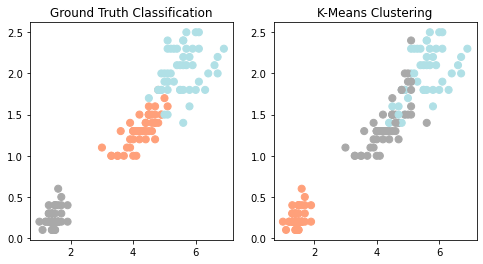

In [21]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)  # creates a subplot with rows=1,cols=2,index=1 selected
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[kmeans.labels_], s=50)
plt.title("K-Means Clustering")


In [22]:
# with np.choose(a, choices) we are creating a array with elements from 'choices' choosen/sequenced with index from 'a'.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.choose.html
#choices = [[0, 1, 2, 3], [10, 11, 12, 13],[20, 21, 22, 23], [30, 31, 32, 33]]
choices = [6,7,8]
correction_index = [2,1,0,0,1,2] # the index should not exceed the number of elements in choices.
np.choose(correction_index, choices)

array([8, 7, 6, 6, 7, 8])

Text(0.5, 1.0, 'K-Means Clustering')

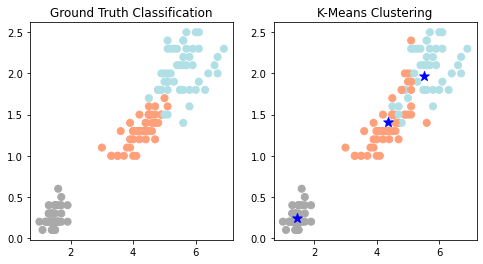

In [23]:
# here we will relabel the predicted labels_ to correct the coloring
#[0,1,2] --> Original label per iris dataset which stands for setosa(0), versicolor(1), verginica(2)
#[1,0,2] --> Predicted labels per kmeans setosa(1), versicolor(0), verginica(2)
relabel = np.choose(kmeans.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[relabel], s=50)
#plot the scaled centroids for our reference.
plt.scatter(x=centroids[:,2], y=centroids[:,3], c='b', s=100, marker='*' )
plt.title("K-Means Clustering")

In [24]:
# now that kmeans has learnt the clustering, lets try to predict a new data.
test_df = pd.DataFrame([
    [5.1,3.5,1.4,0.2], # this is setosa(predicted code 1)
    [7.0,3.2,4.7,1.4], # this is versicolor(predicted code 0)
    [5.9,3.0,5.1,1.8], # this is a virginica( predected code 2)
    [5.4,3.9,1.3,0.4], # setosa(predicted code 1)
    [5.5,2.3,4.0,1.3], # versicolor(predicted code 0)
    [6.2,3.4,5.4,2.3], # virginica( predected code 2)
])
test_df = scaler.transform(test_df)
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [25]:
#as you see setosa is correctly predeicted 100% times but sometimes versicolor and virginica are not predicted correctly.
kmeans.predict(test_df)

array([1, 2, 0, 1, 0, 2])

In [26]:
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

### Clustering performance evaluation - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
1. __from sklearn import metrics__
1. Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.
2. __Adjusted Rand Index__: Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:
    * see below code
    * Perfect labeling is scored 1.0
    * Bad labeling can be 0.0 or negative

In [27]:
#label_true = [0,0,0,1,1,1]  
#label_pred = [1,1,1,0,0,0] # sequence of clustering labels doesn't matter
label_true = [0,0,0,1,1,1]  
label_pred = [2,2,0,3,3,3] # we can premute the labels, we can leave it normalised.
#label_true = [0,0,0,1,1,1]  
#label_pred = [1,2,5,4,2,3] # score as negative
print(metrics.adjusted_rand_score(label_true, label_pred))
print(metrics.adjusted_rand_score(label_pred, label_true)) # this gives the same score as above, arguments are symmetric

0.7058823529411765
0.7058823529411765


In [28]:
label_true = y[0].tolist()
label_pred = kmeans.labels_ # using relabel gives the same result

print(metrics.adjusted_rand_score(label_true, label_pred))#Ground truth is known
print(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')) #Ground truth is not known

0.6201351808870379
0.45994823920518635


In [35]:
# we shouldn't be using classification report here as we know we are not performing classification we are doing clustering. 
#Just because we have used a classification example we can use it just for reference to above clustering score.
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Bias and Variance and tradeoff 
We know that in ML we are trying to predict the function f(), given y and X.Here we are trying to predict the function f^() as close as possible to the __"Ground truth"__(true) function f().
1. __Bias__ : Bias tells us how much our model __f^(x)__ is different from our ground truth model __f(x)__ if I use n different samples of training data from the dataset. As you can see if we use a linear regression for a model with ground truth as sinusidal wave. We will always get a stright line, which is very different from our ground truth, hence this has a __High Bias__. But for every different sample in dataset the linear line is pretty similar, hence it has __Low Variance__.
<img src="images/image92.png" align = "middle" style="width:300px; height:200px;"/>
2. __Variance__: Variance will tell how much my model will vary if I use n different samples of training data from the dataset. If we use a polinomial (say degree 25) we will have curve which will fit our ground truth function pretty nicely, hence we say the polinomial regression has __Low Bias__. But we will get more variance in the sinusidal curve if we use n differetn sample from the dataset, hence we say that this poli regression has __High Variance__.
3. Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
    * To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes/features in the training data or by constraining the model.
    * to gather more training data.
    * To reduce e noise in the traininf data (e.g fix data errors and remove outliers)
    
1. __high bias and low variance__: In this kind of modelling where the model misses the little attentions to training data and over generalise the algorithm are said to have __high Bias__ and are called as __underfitted__ in training phase. Since the generalization is good these model perform well in testing phase.
<img src="images/image17.png" align = "middle" style="width:300px; height:200px;"/>
<img src="images/image18.png" align = "middle" style="width:300px; height:200px;"/> 
12. __Underfitting__ : it occurs when your model is too simple to learn the underlying structure of the data. Reality is just more complex than the model, so its predictions are bound to be inaccurate. The main options to fix this problem are:
    * Selecting a more powerful model, with more parameters
    * Feeding better features to the learning algorithm (feature engineering)
    * Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)
    
2. __high variance and low bias__ : On the other hand if we are using a polynomial regression, it is super flexible and hugs the training set along the arc of the true function (hence have __low bias__). Here the polynomial regression pays lots of attention to the training data (so they have __high variance__ )and does not generalise well on data which it hasn't seen before. As a result, such model perform very well on training data but have high error rates on test data. This kind of model is said to be __overfitted__ in training phase, because the algorithm models th erandom noise in the training data, rather than the intended outputs.

3. The fact here is Liner regression which has __high bias__, will have __low variance__ due to generalisation during training phase. And polynomial regression will have __low bias__ in training phase, but will have __high variance in__ testing phase.
4. Another fact is its not possible to have a ideal model which will have low bais and low variance. Hence there has to be a __trade-off__ between the two. An __optimal balance of bias and variance would never overfit or underfit the model__. To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error. 
                total error = Bias^2+Variance+Irreducible Error  

6. But we are actually interested in Test Error - which is the error we get with the predicted data. We basically want to minimize this. To minimize the error we will have to have a good trade off point between Bias and Variance. So check the below image we are looking for this sweet spot the trade off at center which is th ideal model complexity. This is achieved through __Regularization__.
  
<img src="images/image16.png" align = "middle" style="width:200px; height:200px;"/> 
5. These Bias and Variance is seen mainly in predictive modelling of Supervised Learning Algorithm namely Classification and Regression.
7. __Regularization__ : Constraining a model to make it simpler and reduce the risk of overfitting is called regularization. 
    * You want to find the right balance between fitting the training data perfectly and keeping the model simple enough to ensure that it will generalize well. Page 29 HOML by AG
    * The amount of regularization to apply during learning can be controlled by a hyperparameter. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. Tuning hyperparameters is an important part of building a Machine Learning system
    * https://www.youtube.com/watch?v=gyGMaNUaeic
 
6. Reference:
    * Mitesh Khapra - https://www.youtube.com/watch?v=Y0m136XU65o
    * Josh Stamer - https://www.youtube.com/watch?v=Y0m136XU65o
    * https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Cross-Validation - https://scikit-learn.org/stable/modules/cross_validation.html
1. It is common practice when performing a __(supervised) machine learning__ experiment to hold out part of the available data as a test set X_test, y_test using train_test_split() method of scikit.
2. __train_test_split__ - This is the simplest way to split the dataset. __Split arrays or matrices into random train and test subsets__. But problem with it is that since we split it randomly it may happen that the training data get overly saturated with one type of data and the model may have poor performance on test data. This will result in __overfitting__. That is were Cross-Vlidation comes in picture.
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

3. To solve the problem with train_test_split overfitting, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. This is called as __Cross-Validation__. Its important to note that the trained model is trained using all the training dataset(inclusing validation) except the testing dataset.
<img src='images/image93.png' style='width:300px;height:200px' />
3. __How do you know if your model is OVERFIT__ ? So we start with train_test_split with validation set. We get a accuracy on training set after validating it against validation set. Now when we evaluvate your model against 'test set' you get an estimate how well your model generalizes on the data it has never seen before. This is called as  generalization error. And if your accuracy (error on training set) is better than error on test set (generalization error accuracy is low). That means your model has overfit the training set.
2.  __Cross validation__ allows us to avoid overfitting and used in hyperparameter tuning.
2. There are different techniques in cross-validation. like K-fold(default basic approach), Stratified K-fold, . Leave One Out (LOO), Leave P Out(LPO) etc etc.
3. __K-Fold CV/Default CV__: In k-fold cross-validation, you split the training data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time. Then the accuracy is averaged out. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
    * The __dis-advantages__ with this is that, what if one type of data overload in test/training fold. Then the accuracy of overall model will fall.  
<img src="images/image94.png" align = "middle" style="width:600px; height:250px;"/> 
4. __Stratified K-fold CV__: In some cases, there may be a large imbalance in the response variables. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples. For such problems, a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold. Another major difference between KFold and SKFold is that in stratified you need to supply both X and y labels to teh .split(), bacause Stratifying is done on the y lables. Where as in KFold just X si enough.
5. __Time Series CV__: Splitting a time-series dataset randomly does not work because the time section of your data will be messed up. For a time series forecasting problem, we perform cross validation in the following manner.
<img src="images/image20.png" align = "middle" style="width:600px; height:150px;"/> 
5. Reference:
    * https://en.wikipedia.org/wiki/Cross-validation_(statistics)
    * john Stamer - https://www.youtube.com/watch?v=fSytzGwwBVw
    * https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

### train_test_split

In [68]:
#Simplest method of train_test_split with out CV
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(classification_report(y_test, clf_pred))
print("***************************")
print("classification score: ", clf.score(X_test, y_test)) # .score() will first call a predict and then calculate the accuracy

# Another Example Basic train_test_split wihtout CV using regression and diabettic dataset
# X1, y1 = datasets.load_diabetes(return_X_y=True)
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=32)
# clf = LinearRegression()
# clf.fit(X1, y1)
# clf_pred = clf.predict(X1_test)
# clf.score(X1_test, y1_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

***************************
classification score:  0.9833333333333333


### K-Fold Cross Validation

In [99]:
# Basic usage of KFold
# see how the output is divided into 3 parts.
kf = KFold(n_splits=3, random_state=None)

In [100]:
X2 = [1,2,3,4,5,6,7,8,9]
clf = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
for train_index, test_index in kf.split(X2):
    print( train_index, test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("***************************")
print(classification_report(y_test, clf_pred))
print("***************************")
print(clf.score(X_test, y_test))
# Whole of the above functionality is summed in cross_val_score() function

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]
***************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

***************************
1.0


1. The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

2. The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):


In [71]:
# Keep in mind that we are giving X and y as the input and not X_train and y_train
KnnClf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# cross_cal_score is just a method which uses either KFolf or StrtifiedKFold (Check the documentation which one is used when
# then gives a list of score on each iteration on model. SO you can see min, ma and mean of the accuracy score.
scores = cross_val_score(KnnClf, X, y, cv=5)  #cv=5 means 5 fold
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.93333333 1.         1.         0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.05)


In [77]:
# By default, the score computed at each CV iteration is the score method of the estimator(here Kneighbours). 
# It is possible to change this by using the scoring parameter: 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(KnnClf, X, y, cv=5, scoring='f1_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# In the case of the Iris dataset, the samples are balanced across target classes 
# hence the accuracy and the F1-score are almost equal.

[0.93333333 1.         1.         0.96658312 1.        ]
Accuracy: 0.98 (+/- 0.05)


In [83]:
# Keep in mind that we are giving X and y as the input and not X_train and y_train
# When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, 
# the latter being used if the estimator derives from ClassifierMixin.
DtreeClf = tree.DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(DtreeClf, X, y, cv=cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97777778 0.93333333 0.93333333 0.91111111 0.97777778]
Accuracy: 0.95 (+/- 0.05)


#### The cross_validate function differs from cross_val_score in two ways:

    * It allows specifying multiple metrics for evaluation.
    * It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.


In [86]:
KnnClf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())
scores['test_recall_macro']

array([0.93333333, 1.        , 1.        , 0.96666667, 1.        ])

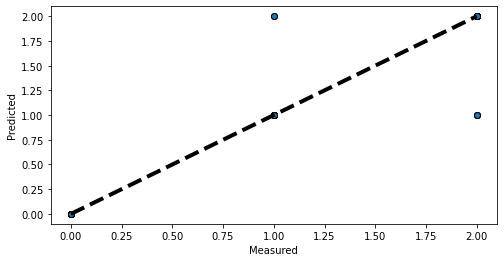

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
# Obtaining predictions by cross-validation and plotting
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
X, y = datasets.load_iris(return_X_y=True)
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# clf = LinearRegression()
# X, y = datasets.load_diabetes(return_X_y=True)
predicted = cross_val_predict(clf, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
predicted

### Stratifies K-Fold CV

In [41]:
# Here SKF tries to create a balanced KFold.
# we will use KNN here to find the accuracu using SKF
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') 

skf = StratifiedKFold(n_splits=5, random_state=None)  # n_splits is same as cv=5 above
accuracy = []

# NOte that in strtified K fold y is required, where as in Kfold its not
# Thats because strtification happends on y values.
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores = accuracy_score(y_test, predictions)
    accuracy.append(scores)
    
print(accuracy)
np.array(accuracy).mean()

[0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 1.0]


0.9800000000000001

In [42]:
# https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
# When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, 
# the latter being used if the estimator derives from ClassifierMixin.
# It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) # we can use 
score = cross_val_score(clf, X, y, cv=cv)
print("Score Card - {} \nMean - {}".format(score, score.mean()))

Score Card - [0.97777778 0.95555556 0.97777778 0.91111111 0.97777778] 
Mean - 0.96


In [43]:
# using cross_val_score
score = cross_val_score(clf, X, y, cv=skf)
print("Score Card - {} \nMean - {}".format(score, score.mean()))

Score Card - [0.93333333 1.         1.         0.96666667 1.        ] 
Mean - 0.9800000000000001


In [44]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
clf.predict_proba(X_test)
clf.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.90909091, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.09090909, 0.18181818, 0.        , 0.        ,
       0.09090909, 0.18181818, 0.09090909, 0.        , 0.27272727])

### Connecting to Database:

In [3]:
# Create your connection.
#cnx = sqlite3.connect('database.sqlite')
#df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

# Regression


## Linear Regression from Statistic Point of View:

1. https://www.youtube.com/watch?v=ZkjP5RJLQF4
1. https://www.youtube.com/watch?v=iAgYLRy7e20
2. https://machinelearningmastery.com/linear-regression-for-machine-learning/
2. __Example scenario to refer__: Let’s assume you are a restaurant owner who is looking to develop a model which will allow you to make a prediction of what amount of tip to expect for a given amount of bill. Most of the time the tip amount is related to the total amount of bill.
3. Regression allows us to model the relationship between 2 or more variables using algebra.
4. There are two kinds of variables:
    1. __Independent variable__: An independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable. Here total bill is a independent variable 
    2. __Dependent variable__: A dependent variable is the variable being tested and measured in a scientific experiment. Here “tip” amount is a dependant variable.
5. Given a scenario to predict the next tip amount, given only a single variable(this case the dependent variable - the tip amount). The best way to predict is the mean value.
<img src='images/image98.png' style='width:450px;height:300px'/>
6. __Residuals/Errors__: The distance of the data points from the “best fit” line is called the residuals/errors. When we square the residuals and sum them we get what is called as Sum of Squared Errors (SSE)
7. __Definition of Linear Regression__: The goal of simple linear regression is to create a linear model that minimizes the sum of squared errors (SSE)
<img src='images/image99.png' style='width:450px;height:300px'/>
8. __Linear regression using least square method__ : 
    1. First step in calculating the regression line is to find out if there is a good correlation between the two variables. Read https://www.mathsisfun.com/data/correlation.html
    <img src='images/image100.png' style='width:450px;height:300px'/> 
    This is to make sure that there is good correlation between the two variables. Calculated using this https://www.mathsisfun.com/data/correlation-calculator.html
    2. When two variables have no relationship, there is no straight-line relationship or non-linear relationship. When one variable changes, it does not influence the other variable.
    3. Then the general equation for calculating a Linear Regression is y = b0 +b1x. Where y is the dependent variable, b0 is the y-crossing and b1 is the slope of the line and x is the independent variable.
    <img src='images/image101.png' style='width:450px;height:300px'/>
    4. Using the above formula it comes to y = 0.1462x - .8188 as the regression line. You need not have to calculate the regression line all by yourself. Scikit learn will do it for you. But what is important is to know how to interpret it and the concept behind it.
    <img src='images/image102.png' style='width:450px;height:300px'/>
    5. Now let us take the sum of squared error. The SSE has reduced to 30.075 which is a significant reduction. So this regression model is a good fit.
    <img src='images/image103.png' style='width:450px;height:300px'/>

9. The best fit regression line will/must pass through the Centroid. Centroid is the point where the mean of both the variables(dependent and independent) meet.
<img src='images/image104.png' style='width:450px;height:300px'/>
10. Multiple Linear Regression: 
    1. Example to refer:
    <img src='images/image105.png' style='width:450px;height:300px'/>
    2. What is multiple regression: It's the same as linear regression. Here we will have more than one independent variable which will be utilized to predict the value of one depend variable. If linear regression is line then multiple regression can be thought of as an plane in 2D with 2 IVs.
    3. __OVERFITTING__ : Adding more independent variable to a multiple regression does not mean the regression will be better or offer better predictions ; in fact it can make things worse and this is called OVERFITTING. So to get a better prediction model the trick/idea is to pick the best independent variable.
    4. __Multicollinearity__ : When we have multiple independent variables to consider, there arises another problem where the independent variables will have some correlation among themself in addition to sharing a correlation with the dependent variable.Also since the independent variables are related to each other we are really not sure which one is actually explaining the variation in the dependent variable.
    5. Equation: 
    <img src='images/image106.png' style='width:450px;height:300px'/>
    <img src='images/image107.png' style='width:450px;height:300px'/>
    6. Steps to prepare the regression model:
    <img src='images/image108.png' style='width:450px;height:300px'/>
    7. For the above example of the delivery time prediction we have 3 independent variables and 1 dependent variable. So we have a total of 6 (IV to DV and IV to IV) relationships to analyze.
    8. __IV to DV relationship analysis__: The miles travelled and the numDelivered are highly correlated to the traveltime(y). Whereas the gas price is very weakly correlated to the traveltime(y). So we will drop the gas price IV in our multiple regression analysis. But just for learning purposes we will keep the gas price to see how it affects the MR in a negative way.
    <img src='images/image109.png' style='width:450px;height:300px'/> 
    What is p doing in correlation - correlation has a $H_0$ Null hypothesis which states that 2 variable under test have no correlation. Thus the p<0.005 means here that we can reject the Null Hypothesis. https://analyse-it.com/docs/user-guide/multivariate/independence-hypothesis-test#:~:text=For%20a%20product%2Dmoment%20correlation,greater%20than)%20the%20hypothesized%20value.

    9. IV to IV relationship : Here the milesTravelled and numDelivered are highly correlated and cause multicollinearity issues. The other 2 are not correlated so does not cause that much of an issue.
    <img src='images/image110.png' style='width:450px;height:300px'/>
    10. summery: <img src='images/image111.png' style='width:450px;height:300px'/>
    11. Next step: <img src='images/image112.png' style='width:450px;height:300px'/>
11. https://www.youtube.com/watch?v=wPJ1_Z8b0wk - Watch this complete video to know exactly how its done. Dont skip.


## Logistic Regression:
* https://www.youtube.com/watch?v=zAULhNrnuL4&list=PLIeGtxpvyG-JmBQ9XoFD4rs-b3hkcX7Uu&index=1
1. A binomial logistic regression (often referred to simply as logistic regression), predicts the probability that an observation falls into one of two categories of a dichotomous dependent variable based on one or more independent variables that can be either continuous or categorical.
<img src='images/image116.png' style='width:450px;height:300px'/>
<img src='images/image117.png' style='width:450px;height:300px'/>
<img src='images/image118.png' style='width:450px;height:300px'/>
2. The scattered plot in this situation doesn’t make any sense ? 
<img src='images/image119.png' style='width:450px;height:300px'/>
3. __Why Logistic and why not linear or multiple regression__:  Linear regression is used when we want to predict a quantitative dependent variable based on another quantitative independent variable. And in our case approve or not approve is not a quantitative DV. 
<img src='images/image120.png' style='width:450px;height:300px'/>

## r-squared and adjusted r-squared and r-squared predicted: 
1. __r-squared__: R-squared is a statistical measure of how __close the data__ are to the fitted regression line. It is also known as the __coefficient of determination__, or the coefficient of multiple determination for multiple regression.
    * R-squared = Explained variation / Total variation
    * https://en.wikipedia.org/wiki/Coefficient_of_determination - check out the figure it explains the formula
    * R-squared is always between 0 and 100% - say a 29% R-squared mean that 29% of data points fall on the regression line.
    * In general, the higher the R-squared, the better the model fits your data.
    * r-square is inversely proportional to SSE
    * r-sq value can be sometimes misleading - In multiple linear regression It’s so easy to add more variables as you think of them, or just because the data are handy. You can add higher-order polynomials to bend and twist that fitted line as you like, but are you fitting real patterns or just connecting the dots? All the while, the R-squared (R2) value increases, teasing you, and egging you on to add more variables!.
    * R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!
    * https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables#:~:text=The%20adjusted%20R%2Dsquared%20is,less%20than%20expected%20by%20chance.
    * __Another problem__: Every time you add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.
2. __Adjusted r-squared__:  The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.
3. __Predicted r-sqaured__: The predicted R-squared indicates how well a regression model predicts responses for new observations. This statistic helps you determine when the model fits the original data but is less capable of providing valid predictions for new observations.
4. Both adjusted R-squared and predicted R-square provide information that helps you assess the number of predictors in your model:
    * Use the adjusted R-square to compare models with different numbers of predictors
    * Use the predicted R-square to determine how well the model predicts new observations and whether the model is too complicated


# points :
2. __Regression vs Classification__: In regression we predict the target which are numerical/continuous in nature and in classification we predict the targets which are categorical in nature. 
3. Regression allows us to model the relationship between 2 or more variables using algebra. The goal of linear regression is to create a model that minimizes the sum of squared errors (SSE). 
5. __Linear Regression__: Predicts one DV utilizing one IV.
6. __Multiple Regression__: It's the same as linear regression. Here we will have more than one independent variable which will be utilized to predict the value of one depend variable.
7. __UniVariate and MultiVariate Regression__: 
    * __Univariate__ : Here in this regression problem we try to predict only one single outcome value with the model. Hence Univariate.
    * __MultiVariate__ : If we were trying to predict multiple  output values with the model, it would be a multivariate regression problem.
7. __Logistic regression__: A binomial logistic regression (often referred to simply as logistic regression), predicts the probability that an observation falls into one of two categories of a __dichotomous dependent__ variable based on one or more independent variables that can be either continuous or categorical.
9. Evaluation Metrics for performance: 
    * __Error__: Error in a regression model is the distance between the actual value and the predicted value.
    * __RMSE__ : Root Mean Squared Error is one of the way to measure the performance of the regression matrix.The RMSE is the square root of the variance of the residuals. Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function.Like MAE  
    $$\sqrt     \sum_{i=0}^m \frac{(\hat y(i)-y(i))^2}{m} $$
    * __MAE__ : suppose that there are many outlier in dataset. In that case, you may consider using the Mean Absolute Error (also called the Average Absolute Deviation). RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.
         $$\sum_{i=0}^m |\frac{(\hat y(i)-y(i))}{m} |$$
    * __SSE__ : Sum of sqaured errors - The distance of the data points from the “best fit” line is called the residuals/errors. When we square the residuals and sum them we get what is called as Sum of Squared Errors (SSE). The square root of SSE is called as RMSE.
    * __SE__ - Standard Error - the grey shaded area represents the standard error (probably it’s the 95% confidence band which means that the standard error will be about half of the width). This indicates how uncertain we are about where the best fit line really “should” be, i.e. where it might be if we had a much larger sample so we could get rid of the statistical uncertainty.The simplest formula that expresses the relation between the two is SE=SD/sqrt(n) where n is the sample size and SD (standard deviation) is the square root of the mean squared error. SE = $\frac{\sqrt SSE}{\sqrt n}$
        * The standard error can be thought of as the average distance of the data point from the regression line in depedant variable units.
11. The Anova Table in regression model analysis gives us the significance of teh overall model. Where as the regression table analysis gives us the stats about regression line.
12. __F-value in Regression__: 
    * https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/#Regression
    * The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result(high F value), then whatever coefficients you included in your model improved the model’s fit.
    * __Read your p-value first__. If the p-value is small (less than your alpha level), you can reject the null hypothesis. Only then should you consider the f-value. If you don’t reject the null, ignore the f-valu

10. what does a p-value tell you in regression : 
    1.  The p-values help determine whether the relationships that you observe in your sample also exist in the larger population. 
    2. https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=Regression%20analysis%20is%20a%20form,correlation%20with%20the%20dependent%20variable.
0. Reference:
    * https://www.youtube.com/watch?v=ZkjP5RJLQF4
    * https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

# Detailed on different types of Regression:
1. https://machinelearningmastery.com/linear-regression-for-machine-learning/
2. https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e -- Must read
3. https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
4. https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
5. How are coefficient dertermined in different regression ?
    * __Simple Linear Regression__ : we can use statistics to estimate the coefficients. This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance.
    * __Ordinary Least Sqaure__ : When we have __one or more than one input__ we can use Ordinary Least Squares to estimate the values of the coefficients. The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients.
    * __Gradient Descent__ : works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.
    * __Regularization__ : There are extensions of the training of the linear model called regularization methods. These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model). Two most popular method:
        * __Lasso Regression__ :where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
        * __Ridge Regression__ : here Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization) i.e 
        __it minimizes sum of residuals + $\lambda$($coefficients1^2$ + $coefficients2^2$ + ..)__  
        
        These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.
6. Preparing data for Regression:
    * __Linear Assumption__ : Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
    * __Remove Noise__ : Linear regression assumes that your input and output variables are not noisy. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
    * __Remove Collinearity__ : Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
    * __Gaussian Distributions__ :  Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
    * __Rescale Inputs__ : Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.
    * See the Wikipedia article on Linear Regression for an excellent list of the assumptions made by the model. https://en.wikipedia.org/wiki/Linear_regression#Assumptions

**For Linear Regression Boston housing market study "Notebook"**

## Polynomial Regression:
1. https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2 -- Must read
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. By using polynomialfeature we convert the X dataset to have polynomial data and then apply a linear regression.
3. __Polynomial Interpolation__: In numerical analysis, polynomial interpolation is the interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.

In [75]:
# Ex how polynomial feature works to transformation of X to poly X data
X = np.array([1,2,3,4]).reshape(-1,1)
print(X.shape, X)
poly = PolynomialFeatures(degree=2) # degree 2 will produce (2+1) columns
X_poly = poly.fit_transform(X)
print(X_poly.shape, X_poly)

(4, 1) [[1]
 [2]
 [3]
 [4]]
(4, 3) [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


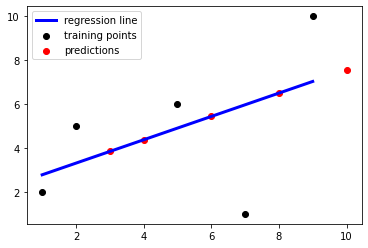

In [107]:
# Ex to show how Linear Regression will predict
X = np.array([1,2,5,7,9]).reshape(-1,1)
y = np.array([2,5,6,1,10])
X_test = np.array([3,10,6,8,4]).reshape(-1,1)

lin = LinearRegression().fit(X, y)
y_pred = lin.predict(X_test)
plt.scatter(X,y, color='black', label='training points')
plt.plot(X,lin.predict(X), color='blue', linewidth=3, label='regression line')
plt.scatter(X_test, y_pred, color='red', label='predictions') # predicted values
plt.legend()

**This example is just to show the working of Polynomial Regression. We should never use a degree 5 for 5 sample dataset. This is actaully overfitting the model**

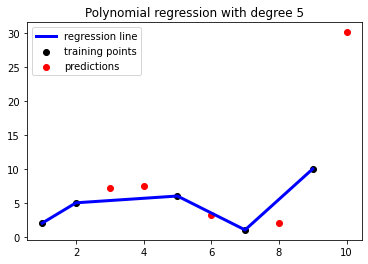

In [106]:
# Using polynomail feature with same dataset as above
X_lin = np.array([1,2,5,7,9]).reshape(-1,1)
y = np.array([2,5,6,1,10])
X_test = np.array([3,10,6,8,4]).reshape(-1,1)

degree=5
poly = PolynomialFeatures(degree)
X = poly.fit_transform(X_lin) # Transform data to polynomial features
lin = LinearRegression().fit(X, y)
y_pred = lin.predict(poly.transform(X_test))

plt.scatter(X_lin,y, color='black', label='training points')
plt.plot(X_lin,lin.predict(X), color='blue', linewidth=3, label='regression line')
plt.scatter(X_test, y_pred, color='red', label='predictions') # predicted values
plt.title("Polynomial regression with degree "+str(degree))
plt.legend()

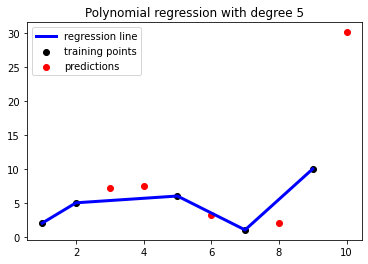

In [112]:
# Same above using pipeline
X = np.array([1,2,5,7,9]).reshape(-1,1)
y = np.array([2,5,6,1,10])
X_test = np.array([3,10,6,8,4]).reshape(-1,1)

degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

plt.scatter(X_lin,y, color='black', label='training points')
plt.plot(X_lin,polyreg.predict(X), color='blue', linewidth=3, label='regression line')
plt.scatter(X_test, polyreg.predict(X_test), color='red', label='predictions') # predicted values
plt.title("Polynomial regression with degree "+str(degree))
plt.legend()


## Ridge Regression:
1. https://www.youtube.com/watch?v=Q81RR3yKn30&t=1078s
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
4. This is Linear least squares with l2 regularization.
5. Is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters

## Lasso Regression:
1. https://www.youtube.com/watch?v=NGf0voTMlcs

## Outliers and how to remove them
* https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
1. __Std MEthod__ : For a variable having a Guassian like distribution, we can use the statistic way of removing the outlier using __Standard Deviation Method__. Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. 
data_mean, data_std = mean(data), std(data)  
identify outliers  
cut_off = data_std * 3  
lower, upper = data_mean - cut_off, data_mean + cut_off  
2. __Interquartile Range__ : For a variable having non-guassian distribution( like exponential, Gamma, Poisson Distribution) we can use IQR to calculate remove the outliers. Use box plots to quickly visualize the outliers. So in this method IQR = q75-q25. and 1.5*IQR are the cut off for the outliers. SOmetimes 3*IQR is used and it comes with experience.
3. More precautions has to be taken while removing Outliers to make sure we are not leaking out data.

**Using Boston dataset - IQR method**

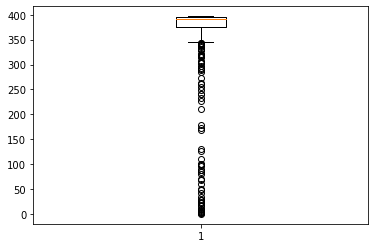

In [115]:
# as you can see there are lots of outliers
plt.boxplot(boston['B']);

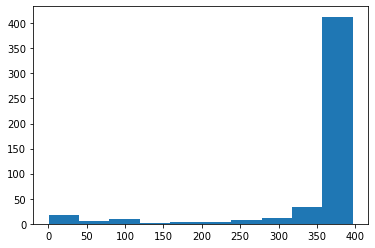

In [118]:
# distribution is not guassian we use IQR method
plt.hist(boston['B']);

In [121]:
# import scipy.stats as stats

iqr = stats.iqr(boston['B'])
q25 = stats.scoreatpercentile(boston['B'], 25)
q75 = stats.scoreatpercentile(boston['B'], 75)
print("iqr={}, q25={}, q75={}".format(iqr, q25, q75))
print(boston['B'].describe())

iqr=20.847500000000025, q25=375.3775, q75=396.225
count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64


344.10624999999993 427.49625000000003
(429,)


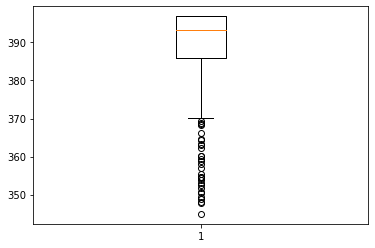

In [156]:
# Outliers are removed but we still have some
cutoff = 1.5*iqr
lower, upper = q25 - cutoff, q75 + cutoff
print(lower, upper)
l = pd.Series([x for x in boston['B'] if x < upper and x > lower])
print(l.shape)
plt.boxplot(l)
plt.show()

## Automatic Outlier Detection
* 
1.  The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data.
2. __Isoloation Forest__ : Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.
    * Perhaps the most important hyperparameter in the model is the __“contamination” argument__, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.
3. __Minimum Covariance Determinant__ : If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers. An object for detecting outliers in a Gaussian distributed dataset.
    * This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier. An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant, or MCD for short.
4. __Local Outlier Factory__ : A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space. This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.
    * The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of __nearest neighbors__ for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.
5. __One-Class SVM__ : The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification. When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.
    * The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1. In this case, we will set it to 0.01, found with a little trial and error.

(455,)


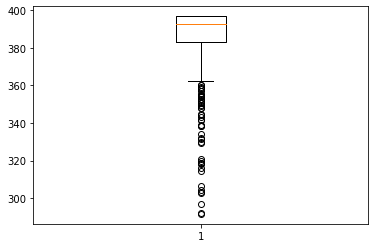

In [162]:
#from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(pd.DataFrame(boston['B']))
mask = yhat != -1
# mask gives a True False table
l = boston['B'][mask]
print(l.shape) # 506-455 outliers removed
plt.boxplot(l);

(500,)


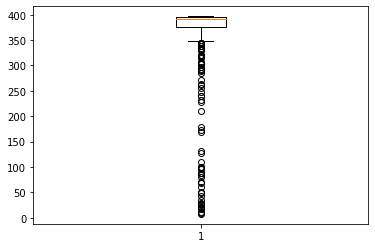

In [163]:
# from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(pd.DataFrame(boston['B']))
mask = yhat != -1
# mask gives a True False table
l = boston['B'][mask]
print(l.shape) # 506-455 outliers removed
plt.boxplot(l); # this removed only 6 outliers, probably because the distribution is not gaussian

(501,)


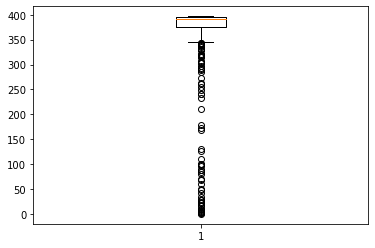

In [164]:
# from sklearn.neighbors import LocalOutlierFactor
LOF = LocalOutlierFactor()
yhat = LOF.fit_predict(pd.DataFrame(boston['B']))
mask = yhat != -1
# mask gives a True False table
l = boston['B'][mask]
print(l.shape) # 
plt.boxplot(l); # 

(470,)


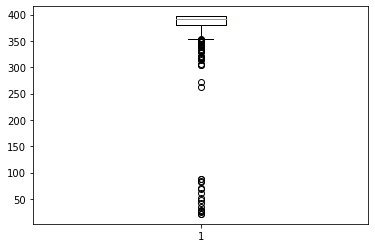

In [166]:
from sklearn.svm import OneClassSVM
OCS = OneClassSVM(nu=0.1)
yhat = OCS.fit_predict(pd.DataFrame(boston['B']))
mask = yhat != -1
# mask gives a True False table
l = boston['B'][mask]
print(l.shape) # 
plt.boxplot(l); # ToDo

In [47]:
# Finding correlation
cor = tnic_df.corr()
cor;

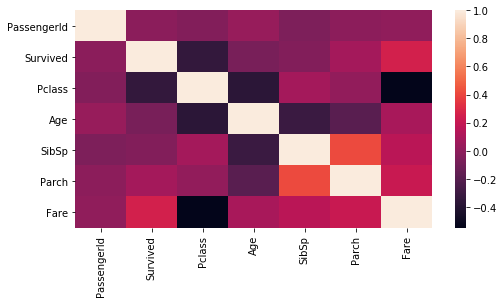

In [48]:
sbs.heatmap(cor);

### Data Manipulation - get_dummies() : We know that Algorithms cannot handle str or text data. So each variable should be converted into a integer. Before that lets see what kind of categorical variables exists
1. __Nominal Variable__: These variables have values(string values) which are not related to each other. Say if we denote Men=1 and Women=2 and Children=3, then there is no relation like 1+2 = 3 or order like 1<2<3 (which would mean men<women<children) . And we want the algorithm to make sure it does not assume this kind of relation. So we cannot denote by integers. So we use what is called as __one hot encoding__ in case of Nominal Variable.
2. __Ordinal Variable__: These variables have a order/relation amoung the values. Say ex. high, medium, low if we denote by 1, 2, 3. Then for sure hihg(1) > medium(2) > low(3).  We use __Ordinal Encoding__ to convert these values. Label encoding assigns each unique value to a different integer
<img src="images/image58.png" align = "middle" style="width:500px; height:200px;"/>   
3. __One hot Encoding__: Here we create one columnn for each of the value in the Nominal Variable. One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. We use OHE from sklearn to get teh job done.
    * We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
    * setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).
4. __get_dummies__ : Also does the same job of encoding but OHE has better parameters and perfor better in production.
5. __Label Encoder__ : Encode __target labels__ with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.


In [231]:
# Label Encoder Ex: say we have a string labels in our target variable 'y'
y = ["paris", "paris", "tokyo", "amsterdam"] # y has to be a series only or list ..dataframe is not allowed
le = LabelEncoder()
le.fit(y)
print(list(le.classes_)) # Holds the label for each class. Each value will be encoded by its position 0=amsterdam to n-1=tokyo
print(le.transform(["tokyo", "tokyo", "paris"]))
print(list(le.inverse_transform([2, 2, 1])))

['amsterdam', 'paris', 'tokyo']
[2 2 1]
['tokyo', 'tokyo', 'paris']


In [232]:
dct={
    'name':['Veena', 'amit', 'seema'],
    'age': [32, 35, 40],
    'sex': ['female', 'male', 'female'],
    'rating': ['Low', 'High', 'Medium']
}
df = pd.DataFrame(dct)
df

,name,age,sex,rating
0,Veena,32,female,Low
1,amit,35,male,High
2,seema,40,female,Medium


In [233]:
# in big df's use this to find the coumns which has text fields.
s = (df.dtypes == 'object')
s[s].index  

Index(['name', 'sex', 'rating'], dtype='object')

### Difference between LabelEncoder() and OridinalEncoder()
both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,)

In [234]:
# ordinal encoder
print(type(df[['rating']]))
print(type(df['rating']))
X = df[['rating']] # df[[]] gives df, 
# X = df['rating'] # df[] gives series is not allowed in ordinalencoder.
encoder = OrdinalEncoder()
df['Encoded'] = encoder.fit_transform(X)
print(encoder.categories_)
df # here ordinal coding is done alphabetically

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
[array(['High', 'Low', 'Medium'], dtype=object)]


,name,age,sex,rating,Encoded
0,Veena,32,female,Low,1.0
1,amit,35,male,High,0.0
2,seema,40,female,Medium,2.0


In [235]:
# OrdinalEncoder with proper order.
X = df[['rating', 'sex']] # df[[]] gives df, 
# X = df['rating'] # df[] gives series thats not allowed in ordinalencoder.
categories = [['Low', 'Medium', 'High'], ['male', 'female']]
encoder = OrdinalEncoder(dtype=int, categories=categories)#Define all unique categories in the order you want them to be encoded
df[['En_rating', 'En_sex']] = encoder.fit_transform(X)
print(encoder.categories_)
df

[array(['Low', 'Medium', 'High'], dtype=object), array(['male', 'female'], dtype=object)]


,name,age,sex,rating,Encoded,En_rating,En_sex
0,Veena,32,female,Low,1.0,0,1
1,amit,35,male,High,0.0,2,0
2,seema,40,female,Medium,2.0,1,1


In [236]:
#Encoding a Nominal varible using ONE HOT ENCODING.
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
df[['Is_F', 'Is_M']] = OH_encoder.fit_transform(df[['sex']]) # This gives a ndarray of (rows,features) with two columns one for male one for female
print(OH, OH.shape) 
df

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] (3, 3)


,name,age,sex,rating,Encoded,En_rating,En_sex,Is_F,Is_M
0,Veena,32,female,Low,1.0,0,1,1.0,0.0
1,amit,35,male,High,0.0,2,0,0.0,1.0
2,seema,40,female,Medium,2.0,1,1,1.0,0.0


In [237]:
# OHE with multiple columns encoding
X = df[['sex', 'rating']]
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH = OH_encoder.fit_transform(X)
print(OH_encoder.categories_)
print(OH) # each category will be a column. So 1st col is female, next male...per this OH_encoder.categories_
print(OH_encoder.get_feature_names()) # Return feature names for output features.
print(OH_encoder.get_feature_names(['sex', 'rating'])) # Return feature names for output features. This uses your list as prefix
# rather than using x0, x1

[array(['female', 'male'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]
[[1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]
['x0_female' 'x0_male' 'x1_High' 'x1_Low' 'x1_Medium']
['sex_female' 'sex_male' 'rating_High' 'rating_Low' 'rating_Medium']


In [238]:
# OHE has options to drop categoris in a feature check the documentation.
# see how it drops the first category in each feature (first in alphabetically) per OH_encoder.categories_
X = df[['sex', 'rating']]
OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='first') # handle_unknown='error' this time 
# this below 'if_binary' will drop the first category in each feature with two categories
# OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='if_binary')
OH = OH_encoder.fit_transform(X)
print(OH_encoder.categories_)
print(OH)
print(OH_encoder.get_feature_names(['sex', 'rating']))

[array(['female', 'male'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
['sex_male' 'rating_Low' 'rating_Medium']


In [241]:
# dummies = pd.get_dummies(df[['sex', 'rating']])
# print(dummies) # then add this df to the original df
# df = pd.concat([df, dummies], axis='columns')
df #

   sex_female  sex_male  rating_High  rating_Low  rating_Medium
0           1         0            0           1              0
1           0         1            1           0              0
2           1         0            0           0              1


,name,age,sex,rating,Encoded,En_rating,En_sex,Is_F,Is_M,sex_female,sex_male,rating_High,rating_Low,rating_Medium
0,Veena,32,female,Low,1.0,0,1,1.0,0.0,1,0,0,1,0
1,amit,35,male,High,0.0,2,0,0.0,1.0,0,1,1,0,0
2,seema,40,female,Medium,2.0,1,1,1.0,0.0,1,0,0,0,1


In [244]:
# note that its very important in ML Algorithms to not have duplicate variables conveying the same information
# That will result into multicollinearity issue. So two of the variables out of the three 'se', 'female', 'male'
# convey the same information. We cannot keep 'sex' as its str and so we can delete 'sex' and 'male'/'female'
# df.drop(columns = ['sex_female', 'sex_male', 'rating_High', 'rating_Low', 'rating_Medium'], inplace=True)
df

,name,age,sex,rating,Encoded,En_rating,En_sex,Is_F,Is_M
0,Veena,32,female,Low,1.0,0,1,1.0,0.0
1,amit,35,male,High,0.0,2,0,0.0,1.0
2,seema,40,female,Medium,2.0,1,1,1.0,0.0


### DecisionTreeRegressor
With the same X,y split we can see that DCRegressor always did a better job.

In [ ]:
DCreg = tree.DecisionTreeRegressor(random_state=0)
DCreg.fit(X_train, y_train)
pred = DCreg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, pred))
RMSE 

### Probabilistic Modelling:
1. A probabilistic method or model is based on the theory of probability or the fact that randomness plays a role in predicting future events.
2. Read notes on Probability and Statistics before proceding further.

### Naive Bayes Classifiers:
1. In machine learning, naïve Bayes classifiers are a family of simple __"probabilistic classifiers"__ based on applying Bayes' theorem with strong (naïve) __independence__ assumptions between the features. They are among the simplest Bayesian network models.
2. Naive Bayes calssifier uses Bayes Theorem:
    __P(A|B) = $\frac{P(B|A)*P(A)}{P(B)}$__
3. Different Naive Bayes' classifier:   
   * __Multi-variate Bernoulli Naive Bayes__: The binomial model is useful if your feature vectors are binary (i.e., 0s and 1s). One application would be text classification with a bag of words model where the 0s 1s are "word occurs in the document" and "word does not occur in the document".
   * __Multinomial Naive Bayes__ The multinomial naive Bayes model is typically used for discrete counts. E.g., if we have a text classification problem, we can take the idea of bernoulli trials one step further and instead of "word occurs in the document" we have "count how often word occurs in the document", you can think of it as "number of times outcome number x_i is observed over the n trials"
   * __Gaussian Naive Bayes__ Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features (e.g., the popular Iris dataset where the features are sepal width, petal width, sepal length, petal length).
4. https://www.youtube.com/watch?v=Q8l0Vip5YUw

## ToDo add your Titanic notebook link here  as an example to Naive bayes

### Feature Extraction:
1. The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.
2. https://scikit-learn.org/stable/modules/feature_extraction.html

In [ ]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document',
]

In [ ]:
#  from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

In [ ]:
X.toarray()

### Simple Imputer: 
1. we use SimpleImputer to replace missing values with the some aggregate value along each column.

In [ ]:
dct={
    'name':['Veena', 'amit', 'seema', 'ranju'],
    'age': [32, 35, 40, 50],
    'sex': ['female', 'male', 'female', 'male'],
    'height': [np.nan, 5.6, 5.6, 5.0],
    'weight': [116, 160, 134, np.nan]
}
df = pd.DataFrame(dct)
df

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(df[['height']])

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean.fit_transform(df[['height']])

### ColumnTransformer:
1. Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:
    * imputes missing values in numerical data, and
    * imputes missing values and applies a one-hot encoding to categorical data.

In [ ]:
# this applies simpleimputer to columns 1,3,4 and OHE to 2
t = [('num', SimpleImputer(strategy='mean'), [1,3,4]), ('cat', OneHotEncoder(), [2])]
# Any columns not specified in the list of transformers are dropped from the dataset by default; 
# this can be changed by setting the remainder argument.
transformer = ColumnTransformer(t, remainder='passthrough')
#The order of the columns in the transformed feature matrix follows the order of how the columns are 
# specified in the transformers list. 
t_df = transformer.fit_transform(df) # this gives a array
# https://stackoverflow.com/questions/54592115/appending-the-columntransformer-result-to-the-original-data-within-a-pipeline
pd.DataFrame(t_df)

### Pipeline :
1. 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# we will use titanic data to show piplelining
df = tnic_df
print(df.columns)
df = df.drop(['PassengerId', 'Parch', 'Ticket', 'Fare'], axis='columns') # lets take few columns for analysis
df.columns

In [ ]:
df.dtypes

In [ ]:
# sepearte Target
y = df['Survived']
X = df.drop(['Survived'], axis='columns')

In [ ]:
# divide into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#seperate the categorical and numerical data
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype =='object']
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(categorical_cols, numerical_cols)

In [ ]:
# Step 1: Define Preprocessing Step
# impute missing values in numerical and  impute+OHE in categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle then into Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

In [ ]:
# Step 2:Define the Model
model = GradientBoostingClassifier()

In [ ]:
# step 3: Create and Evaluvate the Pipeline
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train);

In [ ]:
# Preprocessing of test data, get predictions
# see how all the preprocessing is done in a simple way using pieline
preds = my_pipeline.predict(X_test)

In [ ]:
# Evaluate the model
score = accuracy_score(y_test, preds)
score

Lets see how ???

In [ ]:
data = X_train[['Name', 'Sex', 'Cabin', 'Embarked']]
print(data.shape)
# print(init.head(5))
print(data['Embarked'].isnull().value_counts())
print('***************************************')
imp = SimpleImputer(strategy='most_frequent')
imp_data = imp.fit_transform(data)
print(imp_data.shape)
# imp_data[:,3]

In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
OHE_data.shape

In [ ]:
# Lets include the name column
data = X_train[['Name', 'Sex', 'Cabin', 'Embarked']]
print("Before", data.shape)
imp_data = imp.fit_transform(data)
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
print(OHE_data.shape) # see how 700ish columns are added each name is OHencoded. Which is not good

In [ ]:
data = X_train[['Sex', 'Cabin', 'Embarked']]
print("Before", data.shape)
imp_data = imp.fit_transform(data)
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
print(OHE_data.shape) # 2(sex)+106(cabin)+3(Embarked) = 111

### Ensemble Learning -  Bagging  and Boosting:
1. One of the big disadvantage of decision tree classfier is that these kind of classifier works great with the data (training data) used to create them, but they are not flexible when it comes to classifying new samples. So we go with Ensemble Classifier.
3. Ensemble Learning: Here we use multiple learning algorithm at the same time to increase accuracy. We can also use same algorithm different many times to get a ensemble model (Random forest classification). Ensemble method gives better accuracy, Higher consistncy(avoids overfitting) and also reduces bias-variace error. You decide on using the ensemble model if you find that the results of ensemble model(compared to single model) is worth the extra training. We can use ensemble model on classification and regression model.
<img src="images/image60.png" align = "middle" style="width:400px; height:150px;"/>
2. BootStrap aggregating or Bagging: It is one of the ensemble method. Here Multiple  models of learning algorithms are trained with subsets of DataSet Randomly picked  from the Training dataset.
<img src="images/image61.png" align = "middle" style="width600px; height:250px;"/>
3. Boosting: The approach is same as Bagging with little difference. In here we train a model with subset of training dataset and test the model using testing dataset. Then based on the results we will train the model again with subset of training dataset , but this time it includes each datapoint of the testing dataset with wrong predictions.
<img src="images/image62.png" align = "middle" style="width600px; height:250px;"/>

### RandomForestClassifier:
1. This is one of the Ensemble Classifier. Random forest combines the simplicity of decision tree with flexibity that results in vast improvement in accuracy.
2. 
